In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/amazon-labeled-products/amazon_aspect_labeled_products.tsv', delimiter=',')
df = df.iloc[:, 1:]

In [3]:
df.head(5)

,asin,description,title,h_label,s_label,en_label,ec_label
0,B000B5H26O,['Yorkshire Tea never compromise on the qualit...,"Taylors of Harrogate Yorkshire Gold Tea, 160 T...",0,1,0,0
1,B000F3WS7K,['We choose teas from our three favorite origi...,"Taylors of Harrogate Yorkshire Gold, 40 Teabag...",1,1,0,0
2,B000HRS7OM,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 160 Teabags",0,1,0,0
3,B001E5DXY0,['We choose teas from our three favorite origi...,Taylors of Harrogate Yorkshire Gold Loose Leaf...,0,1,0,0
4,B004G90QE6,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 240 Teabags",0,1,0,0


In [4]:
# Extract descriptions
descriptions = df['description']

# Calculate length statistics
description_lengths = [len(description.split()) for description in descriptions]
mean_length = sum(description_lengths) / len(description_lengths)

# Stats
print("Mean Length:", mean_length)
print("Max Length:", max(description_lengths))
print("Min Length:", min(description_lengths))

Mean Length: 118.03912466843501
Max Length: 1206
Min Length: 4


In [5]:
# Combining multiple binary labels into a single multilabel variable
df['multi_labels'] = df[['h_label', 's_label', 'en_label', 'ec_label']].apply(lambda x: x.tolist(), axis=1)

In [6]:
# filtered_rows = df[(df['h_label'] == 0) & (df['s_label'] == 0) & (df['en_label'] == 0) & (df['ec_label'] == 1)]
# filtered_rows

In [7]:
df.head(5)

,asin,description,title,h_label,s_label,en_label,ec_label,multi_labels
0,B000B5H26O,['Yorkshire Tea never compromise on the qualit...,"Taylors of Harrogate Yorkshire Gold Tea, 160 T...",0,1,0,0,"[0, 1, 0, 0]"
1,B000F3WS7K,['We choose teas from our three favorite origi...,"Taylors of Harrogate Yorkshire Gold, 40 Teabag...",1,1,0,0,"[1, 1, 0, 0]"
2,B000HRS7OM,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 160 Teabags",0,1,0,0,"[0, 1, 0, 0]"
3,B001E5DXY0,['We choose teas from our three favorite origi...,Taylors of Harrogate Yorkshire Gold Loose Leaf...,0,1,0,0,"[0, 1, 0, 0]"
4,B004G90QE6,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 240 Teabags",0,1,0,0,"[0, 1, 0, 0]"


In [8]:
product_index=1807
print("\nProduct Title:", df['title'].iloc[product_index])
print("\nProduct Description:", df['description'].iloc[product_index])
print("\n\nLabels:")
print("\nHealth:", df['h_label'].iloc[product_index])
print("Social", df['s_label'].iloc[product_index])
print("Environment", df['en_label'].iloc[product_index])
print("Economic", df['ec_label'].iloc[product_index])


Product Title: YumEarth Organic Gluten Free Pomegranate Licorice, 5 Ounce Bag (Pack of 12) (Pack May Vary)

Product Description: ['Pomegranate, a YumEarth signature flavor is available in a delicious Organic Gluten Free Licorice. These tasty bites are bursting with pucker-producing pomegranate flavored with real fruit juice. Fear not, we dont use high fructose corn syrup, just delicious organic cane sugar and other simple ingredients that are USDA Organic, Gluten Fee, Non-GMO Project Verified, Vegan, Nut Free and Dairy Free. Youll have one and realize our pomegranate is the bomb(egranate).', 'This product is labelled to United States standards and may differ from similar products sold elsewhere in its ingredients, labeling and allergen warnings', 'Organic Cane Sugar, Organic Brown Rice Syrup, Organic Rice Flour, Organic Corn Starch, Organic Palm Fruit Oil, Natural Flavor, Citric Acid, Sodium Citrate, Organic Pomegranate and Cherry Juice Concentrate, Organic Licorice Extract, Salt, Col

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   asin          9048 non-null   object
 1   description   9048 non-null   object
 2   title         9048 non-null   object
 3   h_label       9048 non-null   int64 
 4   s_label       9048 non-null   int64 
 5   en_label      9048 non-null   int64 
 6   ec_label      9048 non-null   int64 
 7   multi_labels  9048 non-null   object
dtypes: int64(4), object(4)
memory usage: 565.6+ KB


In [10]:
!pip install spacy

In [11]:
!python -m spacy download en_core_web_sm

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [12]:
import re
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Loading spaCy
nlp = spacy.load('en_core_web_sm')

# Function to preprocess the description
def preprocess_description(description):
    if re.match(r"^\[.*\]$", description):
        # To remove square brackets and single quotes
        description = re.sub(r"\[|\]|\'", "", description)
    else:
        # To remove square brackets if only one element present in the list
        description = re.sub(r"\[|\]", "", description)
    
    # To convert string to lowercase
    text = description.lower()
    
    # To remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize the tokens using spaCy
    lemmatized_tokens = [token.lemma_ for token in nlp(' '.join(filtered_tokens))]
    
    return lemmatized_tokens

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [13]:
df['clean description'] = df['description'].apply(preprocess_description)

In [14]:
df.head(5)

,asin,description,title,h_label,s_label,en_label,ec_label,multi_labels,clean description
0,B000B5H26O,['Yorkshire Tea never compromise on the qualit...,"Taylors of Harrogate Yorkshire Gold Tea, 160 T...",0,1,0,0,"[0, 1, 0, 0]","[yorkshire, tea, never, compromise, quality, t..."
1,B000F3WS7K,['We choose teas from our three favorite origi...,"Taylors of Harrogate Yorkshire Gold, 40 Teabag...",1,1,0,0,"[1, 1, 0, 0]","[choose, tea, three, favorite, origin, assam, ..."
2,B000HRS7OM,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 160 Teabags",0,1,0,0,"[0, 1, 0, 0]","[make, blend, tea, assam, africa, sri, lanka, ..."
3,B001E5DXY0,['We choose teas from our three favorite origi...,Taylors of Harrogate Yorkshire Gold Loose Leaf...,0,1,0,0,"[0, 1, 0, 0]","[choose, tea, three, favorite, origin, assam, ..."
4,B004G90QE6,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 240 Teabags",0,1,0,0,"[0, 1, 0, 0]","[make, blend, tea, assam, africa, sri, lanka, ..."


In [15]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Removing the label columns from the training set
train_df = train_df.drop(['h_label', 's_label', 'en_label', 'ec_label'], axis=1)

# Printing the shapes of the training and validation sets
print("Training set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)

Training set shape: (7238, 5)
Validation set shape: (1810, 9)


In [16]:
taxonomy = {
    'Health': {
        'Human health': {
            'Keywords': ['Genetically modified seeds and crops','GMO','added sugar','high in sugar','natural','palm oil','vegan','toxics','toxic chemicals','organic ','non GMO','health','family','natural','kids','children','at home','natural','pesticides','herbicides','chemicals','agricultural chemicals','grass fed','safer chemicals'],
            'Labels': ['U.S. EPA Safer Choice','USDA Organic','organic certification','certified','organic','in-house labels','vegetarian','Gluten free','Ketogenic','High Protein','Sugar free','Energy support','Diet','Caffiene Free','Whole Grain','Low carb','Fat free','healthy','low sodium','lactose free','Dairy free','low fat','no added sugar','plant based','Atkins Diet'],
            'Certifiers': ['Bluesign','EWG','Green Seal','Oeko-Tex','Regenarative Organic Certified','USDA']
        }
    },
    'Sustainability dimension': {
        'Social': {
            'Equitable Access': {
                'Keywords': ['Vegetarian'],
                'Labels': ['Soil Association','nut-free','vegetarian','Gluten free','Ketogenic','High Protein','Sugar free','Energy support','Diet','Caffiene Free','Whole Grain','Low carb','Fat free','Kosher','healthy','low sodium','lactose free','Dairy free','low fat','no added sugar','plant based','Atkins Diet'],
                'Certifiers': []
            },
            'Sustaining Communities': {
                'Keywords': ['local','food miles','locally caught','local fishmongers','imported','at home','growers','small-scale farmers','workers rights','intimately connected to farmers on ground','partially owned by farmers','working directly with farmers','made in source country','safe working conditions','socially responsible','responsible supply chain ','producers','farmers','families','women','child labor','poverty','gender equality','children','forced labor','injustice','workforce','fair share','living wage','leave','social security','formal contract'],
                'Labels': ['certified','Rainforest Alliance','Fairtrade','Soil Association'],
                'Certifiers': ['FAIRTRADE','Fair for Life']
            }
        },
        'Economic': {
            'Keywords': ['local','food miles','locally caught','local fishmongers','imported','Sourced sustainably','at home','farming method','agricultural chemicals','less energy','reduce energy use','energy efficiency ','value chain footprint','domesticated farmed animals','growers','small-scale farmers','workers rights','intimately connected to farmers on ground','partially owned by farmers','working directly with farmers','made in source country','glass bottle','frequently recycled','recycled plastic','high recycled content'],
            'Labels': ['Reducing CO2','RECYCLED BLENDED Claim Standard','made in Green by Oeko-Tex'],
            'Certifiers': ['Energy Star','Energy Star','Fair for Life','Global Recycled Standard','Recycled Claim Standard 100','Recycled Claim Standard Blended']
        },
        'Environment': {
            'Other environmental aspects': {
                'Keywords': ['sourced sustainably','local','food miles','locally caught','local fishmongers','imported','scarce water sources','Genetically modified seeds and crops','GMO','palm oil free','sustainably sourced palm oil','Albacore tuna','Sourced sustainably','natural','palm oil','microbeads','vegan','toxics','toxic chemicals','organic ','non GMO','at home','over fishing','destruction of habitats','indiscriminate fishing of unwanted species','environmentally unfriendly fishing practices','Pole and line caught','natural','farming method','cruelty-free','animal testing','animal farming industry','pesticides','herbicides','chemicals','agricultural chemicals','ecosystem','insect populations','deforestation','responsibly manufactured','safer chemicals','less energy','reduce energy use','climate action ','energy efficiency ','resource use','glass bottle','frequently recycled','recycled plastic','high recycled content','reusable bottle','refillable canteen'],
                'Labels': ['Marine Stewartship Certified','U.S. EPA Safer Choice','USDA Organic','RECYCLED BLENDED Claim Standard','RECYCLED 100 Claim Standard','made in Green by Oeko-Tex','organic certification','certified','organic','Rainforest Alliance','Soil Association'],
                'Certifiers': ['Bluesign','Energy Star','EPEAT','Bluesign','EWG',' AGW','Regenarative Organic Certified','CradletoCradle','ECOLOGO','EWG','FAIRTRADE','Fair for Life','The Forest Stewardship Council (FSC)','Global Recycled Standard','Green Seal','Higg index Materials','Oeko-Tex','Organic Content Standard 100','Rainforest Alliance','Recycled Claim Standard 100','Recycled Claim Standard Blended','Regenarative Organic Certified','USDA','U.S. EPA']
            },
            'Carbon Footprint': {
                'Keywords': ['food miles','carbon offset','carbon reduction ','low carbon transformation ','value chain footprint','domesticated farmed animals'],
                'Labels': ['Carbon Neutral','Carbon free','Climate neutral','Compact by design','Reducing CO2'],
                'Certifiers': ['Carbonnuetral.com','Carbonfund.org','SCS Global Services','Climate Partner','Carbon Trust','Amazon','Energy Star']
            },
            'Animal Welfare': {
                'Keywords': ['Genetically modified seeds and crops','GMO','palm oil free','sustainably sourced palm oil','Albacore tuna','Sourced sustainably','palm oil','vegan','Vegetarian','over fishing','destruction of habitats','indiscriminate fishing of unwanted species','environmentally unfriendly fishing practices','Pole and line caught','herbicides','chemicals','agricultural chemicals','ecosystem','insect populations','deforestation','high welfare farming','domesticated farmed animals'],
                'Labels': ['Animal Welfare approved ','Marine Stewartship Certified','vegetarian','Dairy free','plant based'],
                'Certifiers': ['AGW','Regenarative Organic Certified']
            }
        }
    }
}

In [17]:
health = ['Genetically modified seeds and crops','GMO','added sugar','high in sugar','natural','palm oil','vegan','toxics','toxic chemicals','organic ','non GMO','health','family','natural','kids','children','at home','natural','pesticides','herbicides','chemicals','agricultural chemicals','grass fed','safer chemicals','U.S. EPA Safer Choice','USDA Organic','organic certification','certified','organic','in-house labels','vegetarian','Gluten free','Ketogenic','High Protein','Sugar free','Energy support','Diet','Caffiene Free','Whole Grain','Low carb','Fat free','healthy','low sodium','lactose free','Dairy free','low fat','no added sugar','plant based','Atkins Diet']
social = ['Vegetarian','Soil Association','nut-free','vegetarian','Gluten free','Ketogenic','High Protein','Sugar free','Energy support','Diet','Caffiene Free','Whole Grain','Low carb','Fat free','Kosher','healthy','low sodium','lactose free','Dairy free','low fat','no added sugar','plant based','Atkins Diet','local','food miles','locally caught','local fishmongers','imported','at home','growers','small-scale farmers','workers rights','intimately connected to farmers on ground','partially owned by farmers','working directly with farmers','made in source country','safe working conditions','socially responsible','responsible supply chain ','producers','farmers','families','women','child labor','poverty','gender equality','children','forced labor','injustice','workforce','fair share','living wage','leave','social security','formal contract','certified','Rainforest Alliance','Fairtrade','Soil Association']
environment = ['sourced sustainably','local','food miles','locally caught','local fishmongers','imported','scarce water sources','Genetically modified seeds and crops','GMO','palm oil free','sustainably sourced palm oil','Albacore tuna','Sourced sustainably','natural','palm oil','microbeads','vegan','toxics','toxic chemicals','organic ','non GMO','at home','over fishing','destruction of habitats','indiscriminate fishing of unwanted species','environmentally unfriendly fishing practices','Pole and line caught','natural','farming method','cruelty-free','animal testing','animal farming industry','pesticides','herbicides','chemicals','agricultural chemicals','ecosystem','insect populations','deforestation','responsibly manufactured','safer chemicals','less energy','reduce energy use','climate action ','energy efficiency ','resource use','glass bottle','frequently recycled','recycled plastic','high recycled content','reusable bottle','refillable canteen','Marine Stewartship Certified','U.S. EPA Safer Choice','USDA Organic','RECYCLED BLENDED Claim Standard','RECYCLED 100 Claim Standard','made in Green by Oeko-Tex','organic certification','certified','organic','Rainforest Alliance','Soil Association','food miles','carbon offset','carbon reduction ','low carbon transformation ','value chain footprint','domesticated farmed animals','Carbon Neutral','Carbon free','Climate neutral','Compact by design','Reducing CO2','Genetically modified seeds and crops','GMO','palm oil free','sustainably sourced palm oil','Albacore tuna','Sourced sustainably','palm oil','vegan','Vegetarian','over fishing','destruction of habitats','indiscriminate fishing of unwanted species','environmentally unfriendly fishing practices','Pole and line caught','herbicides','chemicals','agricultural chemicals','ecosystem','insect populations','deforestation','high welfare farming','domesticated farmed animals','Animal Welfare approved ','Marine Stewartship Certified','vegetarian','Dairy free','plant based']
economic = ['local','food miles','locally caught','local fishmongers','imported','Sourced sustainably','at home','farming method','agricultural chemicals','less energy','reduce energy use','energy efficiency ','value chain footprint','domesticated farmed animals','growers','small-scale farmers','workers rights','intimately connected to farmers on ground','partially owned by farmers','working directly with farmers','made in source country','glass bottle','frequently recycled','recycled plastic','high recycled content','Reducing CO2','RECYCLED BLENDED Claim Standard','made in Green by Oeko-Tex']

In [18]:
# The keywords are then split into a list of words to handle phrases in keywords
health = [word for term in health for word in term.split()]
social = [word for term in social for word in term.split()] 
environment = [word for term in environment for word in term.split()]
economic = [word for term in economic for word in term.split()]

In [19]:
# Function to preprocess the keywords
def preprocess_keywords(keywords):
    # To convert the keywords to lowercase
    keywords = [keyword.lower() for keyword in keywords]
    
    # To remove special characters and digits
    keywords = [re.sub(r'[^a-zA-Z]', ' ', keyword) for keyword in keywords]
    
    # Tokenize the keywords
    tokenized_keywords = [word_tokenize(keyword) for keyword in keywords]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_keywords = [word for tokens in tokenized_keywords for word in tokens if word not in stop_words]
    
    # Lemmatize the tokens using spaCy
    lemmatized_keywords = [token.lemma_ for token in nlp(' '.join(filtered_keywords))]
    
    return lemmatized_keywords


In [20]:
# Preprocessing the keywords
clean_health = preprocess_keywords(health)
clean_social = preprocess_keywords(social)
clean_environment = preprocess_keywords(environment)
clean_economic = preprocess_keywords(economic)

In [21]:
#Remove duplicates from the keyword lists
clean_health = list(set(clean_health))
clean_social = list(set(clean_social))
clean_environment = list(set(clean_environment))
clean_economic = list(set(clean_economic))

In [22]:
!pip install corextopic

In [23]:
# Extracting preprocessed descriptions from the training set
preprocessed_descriptions = train_df['clean description']

# Combine preprocessed keywords and descriptions
#preprocessed_data = clean_health + clean_social + clean_economic + clean_environment + preprocessed_descriptions
preprocessed_data = []
preprocessed_data.extend(clean_health)
preprocessed_data.extend(clean_social)
preprocessed_data.extend(clean_environment)
preprocessed_data.extend(clean_economic)
preprocessed_data.extend(item for sublist in preprocessed_descriptions for item in sublist)

# Creating the vocabulary which is a set of all words in keywords and description
vocabulary = set(preprocessed_data)

# Remove any upper case characters from the vocabulary
vocabulary = {word for word in vocabulary if not any(char.isupper() for char in word)}

In [24]:
len(vocabulary)

11403

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating an instance of CountVectorizer
vectorizer = CountVectorizer(binary=True)

# Fit the vectorizer on the vocabulary
vectorizer.fit(vocabulary)

# Vectorize the train set
X_train = vectorizer.transform(train_df['clean description'].apply(' '.join))

# Print the shape of the vectorized data
print("Vectorized train set shape:", X_train.shape)

Vectorized train set shape: (7238, 11381)


In [26]:
from corextopic import corextopic as ct

anchor_words = [
    clean_health,       # Anchors for Topic 1 (Health)
    clean_social,       # Anchors for Topic 2 (Social)
    clean_environment,  # Anchors for Topic 3 (Environment)
    clean_economic     # Anchors for Topic 4 (Economic)
]

vocab = vectorizer.get_feature_names_out()

# Anchor_strength parameter
anchor_strength = 10

# Number of topics to extract
num_topics = 4

topic_model = ct.Corex(n_hidden=num_topics, seed=42)
topic_model.fit(X_train, words=vocab, anchors=anchor_words, anchor_strength=anchor_strength)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: natural, sugar, free, oil, gluten, fat, gmo, high, organic, non
1: free, high, gluten, make, small, source, food, certify, family, farmer
2: high, use, organic, certify, make, food, free, gmo, natural, non
3: use, high, small, food, make, source, farmer, work, content, method


In [27]:
#Evaluation of the model

# Extract the preprocessed description from the validation set
preprocessed_val = val_df['clean description'].apply(' '.join)

# Fit the vectorizser on preprocessed description of validation set
X_val = vectorizer.transform(preprocessed_val)
topic_model.transform(X_val)

# Get the predicted topics
predicted_topics = topic_model.predict(X_val)

# Get the original labels from the dataset
true_labels = val_df['multi_labels'].tolist()

In [28]:
predicted_topics_list = predicted_topics.tolist()
predicted_topics_list = [[int(topic) for topic in sample] for sample in predicted_topics]

In [29]:
from sklearn.metrics import classification_report

# calculate precision, recall and f1-score
print(classification_report(
    true_labels,
    predicted_topics_list,
    output_dict=False,
    zero_division=0,
    target_names=['health', 'social', 'environment','economic']
))

              precision    recall  f1-score   support

      health       0.66      0.58      0.62       719
      social       0.97      0.36      0.53      1778
 environment       0.20      0.81      0.32       150
    economic       0.14      0.89      0.24        62

   micro avg       0.54      0.46      0.49      2709
   macro avg       0.49      0.66      0.43      2709
weighted avg       0.82      0.46      0.53      2709
 samples avg       0.25      0.36      0.28      2709



In [30]:
from sklearn.metrics import accuracy_score

# Convert lists to numpy arrays
true_labels_array = np.array(true_labels)
predicted_labels_array = np.array(predicted_topics_list)

# Flatten the arrays to match the shape expected by accuracy_score
true_labels_flat = true_labels_array.flatten()
predicted_labels_flat = predicted_labels_array.flatten()

# Calculate accuracy
accuracy = accuracy_score(true_labels_flat, predicted_labels_flat)
print("Accuracy:", accuracy)

Accuracy: 0.6493093922651934


In [31]:
from sklearn.metrics import hamming_loss

# Calculate hamming loss
print("Hamming Loss:",hamming_loss(true_labels, predicted_topics_list))

Hamming Loss: 0.35069060773480665


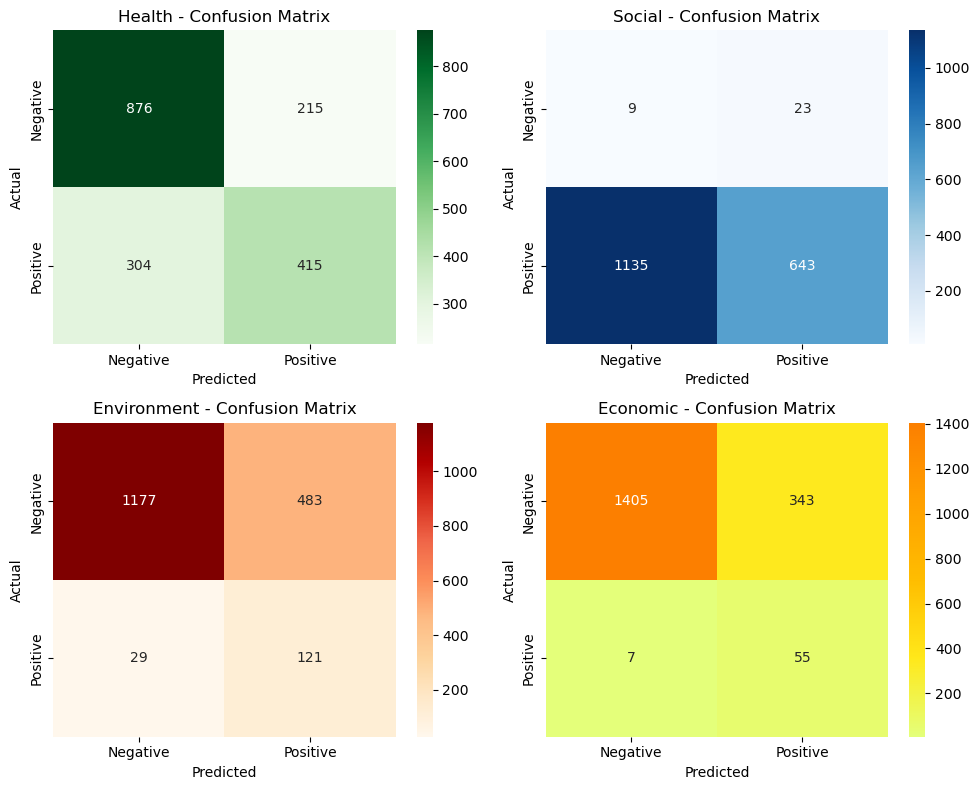

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

h_true_labels = [x[0] for x in true_labels]
h_predicted_labels = [x[0] for x in predicted_topics_list]
s_true_labels = [x[1] for x in true_labels]
s_predicted_labels = [x[1] for x in predicted_topics_list]
en_true_labels = [x[2] for x in true_labels]
en_predicted_labels = [x[2] for x in predicted_topics_list]
ec_true_labels = [x[3] for x in true_labels]
ec_predicted_labels = [x[3] for x in predicted_topics_list]

# Create confusion matrix
h_conf_matrix = confusion_matrix(h_true_labels, h_predicted_labels)
s_conf_matrix = confusion_matrix(s_true_labels, s_predicted_labels)
en_conf_matrix = confusion_matrix(en_true_labels, en_predicted_labels)
ec_conf_matrix = confusion_matrix(ec_true_labels, ec_predicted_labels)

# Subplot for displaying the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot each confusion matrix using seaborn heatmap
class_names = ['Negative', 'Positive']

sns.heatmap(h_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names, ax=axes[0, 0])
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_title('Health - Confusion Matrix')

sns.heatmap(s_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[0, 1])
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')
axes[0, 1].set_title('Social - Confusion Matrix')

sns.heatmap(en_conf_matrix, annot=True, fmt='d', cmap='OrRd', xticklabels=class_names, yticklabels=class_names, ax=axes[1, 0])
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')
axes[1, 0].set_title('Environment - Confusion Matrix')

sns.heatmap(ec_conf_matrix, annot=True, fmt='d', cmap='Wistia', xticklabels=class_names, yticklabels=class_names, ax=axes[1, 1])
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')
axes[1, 1].set_title('Economic - Confusion Matrix')

plt.tight_layout()
plt.show()

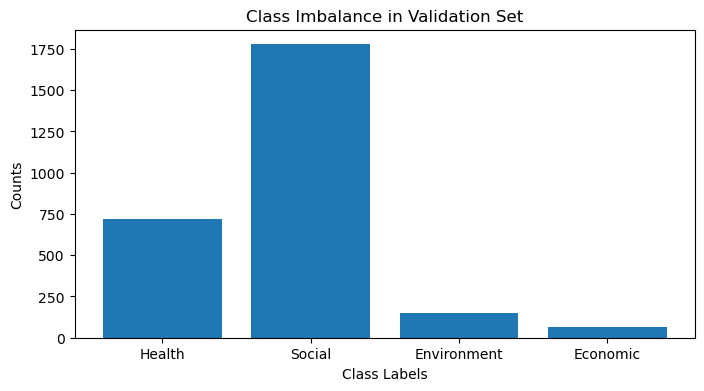

In [33]:
true_labels = val_df['multi_labels'].tolist()

# Initialize counters for each class label
class_counts = {0: 0, 1: 0, 2: 0, 3: 0}

# Calculate class counts
for labels in true_labels:
    for i, count in enumerate(labels):
        class_counts[i] += count

class_labels = ['Health', 'Social', 'Environment', 'Economic']
counts = [class_counts[i] for i in range(len(class_labels))]

plt.figure(figsize=(8, 4))
plt.bar(class_labels, counts)
plt.xlabel('Class Labels')
plt.ylabel('Counts')
plt.title('Class Imbalance in Validation Set')
plt.show()

In [34]:
#Testing for a product

kellogs_des = 'Every bite of these crispy, golden flakes is just as delicious as the first Toasted flakes of golden corn A healthy breakfast meal to start your day Made from real natural corn Youll be on your way to a great day when you pour a bowl of kelloggs flakes cereal into your breakfast bowl'

#biona_des = 'Certified Organic Ingredients Suitable for vegan No added cane or beet sugar Completely natural Gluten and wheat free'

# Preprocess the description
prep_description = preprocess_description(kellogs_des)
#prep_description = preprocess_description(biona_des)

preprocessed_text = ' '.join(prep_description)

# Print the preprocessed text
print("Preprocessed text:", preprocessed_text)

Preprocessed text: every bite crispy golden flake delicious first toast flake golden corn healthy breakfast meal start day make real natural corn you ll way great day pour bowl kelloggs flake cereal breakfast bowl


In [35]:
# Fit the vectorizser on preprocessed description of validation set
X_val_new = vectorizer.transform([preprocessed_text])
topic_model.transform(X_val_new)

# Get the predicted topics
predicted_topics = topic_model.predict(X_val_new)

print(predicted_topics)

[[False  True False False]]


In [36]:
# category weights based on importance from the user survey
category_weights = {
    'health': 0.3,
    'social': 0.2,
    'environment': 0.3,
    'economic': 0.2
}

# Calcultaing sustainability score for the above item
predicted_labels = [1, 1, 1, 0]
#predicted_labels = [0, 1, 0, 0]

# Calculate the weighted sum of category labels
weighted_sum = sum(label * weight for label, weight in zip(predicted_labels, category_weights.values()))

# Calculate the total weight
total_weight = sum(category_weights.values())

# Calculate the sustainability rating
sus_rating = weighted_sum / total_weight

print("Sustainability Rating:", (sus_rating * 4)+1)

Sustainability Rating: 4.2


In [37]:
val_df['predicted_label'] = predicted_topics_list

In [38]:
# Save the dataset as a CSV file
val_df.to_csv('val_df.csv', index=False)

In [39]:
pd.set_option("display.max_colwidth", None)

In [40]:
val_df.head(1)

,asin,description,title,h_label,s_label,en_label,ec_label,multi_labels,clean description,predicted_label
5763,B00BTL3HOK,"['A great way to sweeten hot and cold beverages, fresh fruit and more. Each packet sweetens like two teaspoons of sugar and has no calories or carbohydrates per serving. Packing Type: Bag; Premeasured: No.', ""'DEXTROSE, MALTODEXTRIN, SUCRALOSE.'"", 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.']","JOJ827357 - Splenda No Calorie Sweetener, 1.63-lb Bag",1,1,0,0,"[1, 1, 0, 0]","[great, way, sweeten, hot, cold, beverage, fresh, fruit, packet, sweeten, like, two, teaspoon, sugar, calorie, carbohydrate, per, serve, packing, type, bag, premeasure, dextrose, maltodextrin, sucralose, statement, regard, dietary, supplement, evaluate, fda, intend, diagnose, treat, cure, prevent, disease, health, condition]","[0, 0, 0, 0]"


In [41]:
filtered_row = val_df[val_df['asin'] == 'B005VUFKSG']

In [42]:
filtered_row

,asin,description,title,h_label,s_label,en_label,ec_label,multi_labels,clean description,predicted_label
8132,B005VUFKSG,"['Purely Elizabeth Ancient Grain Granola Cereal Original, 12 Ounce (Pack of 6)', 'Purely Elizabeth Ancient Grain Granola Cereal Original, 12 Ounce (Pack of 6)', ""'ORGANIC GLUTEN-FREE OATS, ORGANIC COCONUT SUGAR, ORGANIC RAW VIRGIN COCONUT OIL, ORGANIC SUNFLOWER SEEDS, ORGANIC PUFFED AMARANTH, ORGANIC MILLET FLAKES, ORGANIC QUINOA FLAKES, ORGANIC CHIA SEEDS, ORGANIC CINNAMON, SALT.'"", 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.']","Purely elizabeth Ancient Grain Granola Cereal Original, 12 Ounce (Pack of 6)",0,1,0,0,"[0, 1, 0, 0]","[purely, elizabeth, ancient, grain, granola, cereal, original, ounce, pack, purely, elizabeth, ancient, grain, granola, cereal, original, ounce, pack, organic, gluten, free, oats, organic, coconut, sugar, organic, raw, virgin, coconut, oil, organic, sunflower, seed, organic, puff, amaranth, organic, millet, flake, organic, quinoa, flake, organic, chia, seed, organic, cinnamon, salt, statement, regard, dietary, supplement, evaluate, fda, intend, diagnose, treat, cure, prevent, disease, health, condition]","[1, 1, 0, 0]"
